In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
import time

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_500_2021q2','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Kraków,Podgórze,małopolskie,50.036500,20.015500,wtorny,46.30,2,6,8,2021.0,464000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,10021.598272,242
1,Warszawa,Praga-Południe,mazowieckie,52.238088,21.115236,wtorny,80.91,2,2,5,2013.0,849000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,10493.140527,142
2,Katowice,Os. Paderewskiego,śląskie,50.252783,19.038932,pierwotny,44.21,2,1,9,2023.0,373100.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,8439.267134,326
3,Warszawa,Wola,mazowieckie,52.234980,20.961730,wtorny,34.00,1,1,5,1952.0,409900.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,12055.882353,412
4,Poznań,Stare Miasto,wielkopolskie,52.453445,16.915134,wtorny,46.70,2,1,15,1984.0,329000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7044.967880,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50411,Kołobrzeg,kołobrzeski,zachodniopomorskie,54.175917,15.583267,wtorny,27.00,2,parter,2,1948.0,340000.0,https://gratka.pl/nieruchomosci/mieszkanie-kol...,12592.592593,274
50412,Pruszków,pruszkowski,mazowieckie,52.155775,20.804646,wtorny,48.42,2,2,3,2019.0,539000.0,https://gratka.pl/nieruchomosci/mieszkanie-pru...,11131.763734,245
50413,Kraków,Os. Prądnik Biały,małopolskie,50.092900,19.926700,pierwotny,54.00,3,4,5,2020.0,499002.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,9240.777778,264
50414,Warszawa,Bielany,mazowieckie,52.267688,20.947620,wtorny,82.00,2,11,11,2001.0,940000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,11463.414634,350


## data preparation

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50416 entries, 0 to 50415
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            50416 non-null  object 
 1   district        42465 non-null  object 
 2   voivodeship     50416 non-null  object 
 3   localization_y  50416 non-null  float64
 4   localization_x  50416 non-null  float64
 5   market          50416 non-null  object 
 6   area            50416 non-null  float64
 7   rooms           50416 non-null  object 
 8   floor           50416 non-null  object 
 9   floors          50416 non-null  object 
 10  build_yr        50416 non-null  float64
 11  price           50416 non-null  float64
 12  url             50416 non-null  object 
 13  price_of_sqm    50416 non-null  float64
 14  cluster         50416 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 5.6+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','price_of_sqm','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50416 entries, 0 to 50415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   market    50416 non-null  object 
 1   area      50416 non-null  float64
 2   rooms     50416 non-null  object 
 3   floor     50416 non-null  object 
 4   floors    50416 non-null  object 
 5   build_yr  50416 non-null  float64
 6   price     50416 non-null  float64
 7   cluster   50416 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.1+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,area,build_yr,price,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,46.30,2021.0,464000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.91,2013.0,849000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44.21,2023.0,373100.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.00,1952.0,409900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.70,1984.0,329000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50411,27.00,1948.0,340000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50412,48.42,2019.0,539000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50413,54.00,2020.0,499002.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50414,82.00,2001.0,940000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = frame.drop('price',axis=1).values
y = frame.price.values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## random forest regressor and grid search

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [14]:
parameters = [{'n_estimators':[10,30,50,100,200]}]

In [15]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = parameters,
                           cv = 3,
#                            n_jobs = -1,
                          )

In [16]:
start = time.time()

grid_search = grid_search.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 41.0 min.


In [17]:
grid_search.best_score_

0.8239460565809137

In [18]:
grid_search.best_params_

{'n_estimators': 200}

In [19]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.812018,0.040122,0.064495,0.001245,10,{'n_estimators': 10},0.787100,0.808811,0.812206,0.802705,0.011121,5
1,45.911162,1.306683,0.154928,0.002629,30,{'n_estimators': 30},0.800666,0.824745,0.828656,0.818022,0.012376,3
2,81.504608,4.766890,0.286436,0.027293,50,{'n_estimators': 50},0.804798,0.817592,0.829716,0.817369,0.010174,4
3,174.841080,6.116345,0.579486,0.014297,100,{'n_estimators': 100},0.807297,0.833496,0.828169,0.822987,0.011306,2
4,315.774624,8.285223,1.150886,0.183314,200,{'n_estimators': 200},0.811583,0.830325,0.829931,0.823946,0.008744,1


In [20]:
start = time.time()

model = RandomForestRegressor(n_estimators = 30, random_state = 0)
model.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 1.0 min.


## model evaluation

In [21]:
from sklearn.metrics import r2_score

In [22]:
predictions = model.predict(X_test)

In [23]:
r2_score(y_test,predictions)

0.8451581253762033

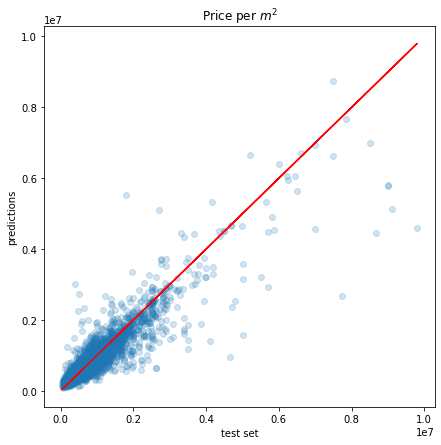

In [24]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(x=y_test,y=predictions,edgecolor=None,alpha=0.2)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.title('Price per $m^{2}$')

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [25]:
errors = y_test - predictions

Text(0.5, 1.0, 'Error distribution')

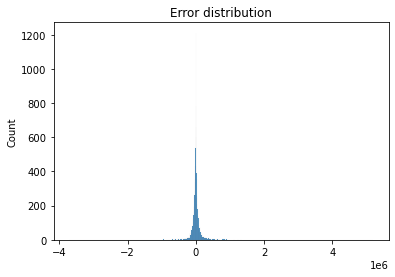

In [26]:
# plt.xlim(-200000,200000)

sns.histplot(errors)
plt.title('Error distribution')

In [27]:
predictions

array([ 535941.83333333,  319301.05      ,  501533.33333333, ...,
        430000.        ,  254600.        , 1582466.66666667])

In [28]:
predictions[:20]/y_test[:20]

array([0.89772501, 0.92785548, 0.98147423, 0.81017428, 1.23815883,
       0.97674797, 0.77373759, 0.98276222, 0.99891078, 1.07293848,
       0.99349638, 0.79410636, 0.96269802, 0.94366801, 1.19188249,
       0.83650924, 1.00613648, 1.01144186, 0.99783743, 1.00398393])

## k-Fold Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
start = time.time()

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 13.0 min.


In [29]:
accuracies.mean()

0.8297670109288541

In [30]:
accuracies.std()

0.020663496871000542

In [31]:
accuracies

array([0.84618275, 0.83930467, 0.85471206, 0.8134102 , 0.84599634,
       0.79258304, 0.82992908, 0.79580844, 0.83703493, 0.8427086 ])

## saving data

In [32]:
import joblib
joblib.dump(model, 'random_forest_model_2021q2')

['random_forest_model_a1']